<a href="https://colab.research.google.com/github/Shahad24/Object-Detection-using-CNN/blob/main/CNNmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [137]:

from keras.datasets import cifar10
import matplotlib.pyplot as plt
from keras import models
from tensorflow.keras import datasets, layers, models
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix, multilabel_confusion_matrix
import numpy as np

In [138]:
#a) Importing the dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
img_rows, img_cols , channels= 32,32,3


In [139]:
x_train.shape

(50000, 32, 32, 3)

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


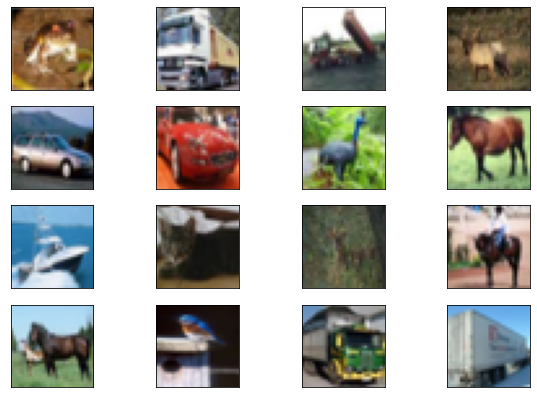

In [140]:
# summarize loaded dataset
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))
# create labels
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

## plot few images
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
plt.show()

In [141]:
#b) Preprocessing the data
# Normalize dataset each pixel represented by value between 0 and 1
x_train = np.array(x_train, dtype=np.float32)
x_test = np.array(x_test, dtype=np.float32)
x_train  = x_train/255
x_test  = x_test/255

#to_categorical y_train and y_test 
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)



In [142]:
def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [143]:
#c) Building the model 
model = Sequential()

#• Set up the layers
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(32, 32, 3)))

model.add(Conv2D(16, (3, 3), activation='relu'))

model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))

model.add(Conv2D(32, (3, 3), activation='relu'))

model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(Flatten())

model.add(Dense(10, activation='softmax'))

#• Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy',f1_m, precision_m, recall_m])

#d) Training the model.
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test), verbose=1)

loss, accuracy, f1_score, precision, recall = model.evaluate(x_test, y_test, verbose=1)

model.summary()


Epoch 1/20
1563/1563 [==============================] - 9s 5ms/step - loss: 1.8282 - accuracy: 0.3161 - f1_m: 0.1219 - precision_m: 0.4042 - recall_m: 0.0775 - val_loss: 1.3804 - val_accuracy: 0.4976 - val_f1_m: 0.3949 - val_precision_m: 0.7002 - val_recall_m: 0.2795
Epoch 2/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3225 - accuracy: 0.5206 - f1_m: 0.4455 - precision_m: 0.7098 - recall_m: 0.3298 - val_loss: 1.2057 - val_accuracy: 0.5650 - val_f1_m: 0.5108 - val_precision_m: 0.7202 - val_recall_m: 0.3992
Epoch 3/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1380 - accuracy: 0.5956 - f1_m: 0.5518 - precision_m: 0.7508 - recall_m: 0.4403 - val_loss: 1.1140 - val_accuracy: 0.6078 - val_f1_m: 0.5810 - val_precision_m: 0.7569 - val_recall_m: 0.4747
Epoch 4/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0069 - accuracy: 0.6432 - f1_m: 0.6162 - precision_m: 0.7722 - recall_m: 0.5160 - val_loss: 1.0261 - val_accuracy: 0.6

In [144]:
#e) Making prediction on test set
y_predictions = model.predict(x_test).argmax(axis=1)
y_test = np.argmax(y_test,axis=1)


In [145]:
# f) Evaluating model performance on test set by plotting confusion matrix for each class, theprecision, the recall and accuracy metrics
import itertools
plt.rcParams['figure.figsize'] = [10,7]

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()



[[637  29  99  25  32   5   7  10 116  40]
 [ 14 874   6   7   5   1   4   0  36  53]
 [ 43   8 670  51  84  49  45  18  18  14]
 [ 19  12 108 468  75 154  81  34  19  30]
 [ 15   6  94  56 673  26  53  62  10   5]
 [  8   9  79 178  56 584  34  43   5   4]
 [  4   1  77  63  46  13 781   6   6   3]
 [ 14   7  53  44  77  57   8 721   5  14]
 [ 43  24  15  18   4   3  13   5 844  31]
 [ 37 110  10  13  12   3   9  10  26 770]]
Confusion Matrix :
[[[8803  197]
  [ 363  637]]

 [[8794  206]
  [ 126  874]]

 [[8459  541]
  [ 330  670]]

 [[8545  455]
  [ 532  468]]

 [[8609  391]
  [ 327  673]]

 [[8689  311]
  [ 416  584]]

 [[8746  254]
  [ 219  781]]

 [[8812  188]
  [ 279  721]]

 [[8759  241]
  [ 156  844]]

 [[8806  194]
  [ 230  770]]]


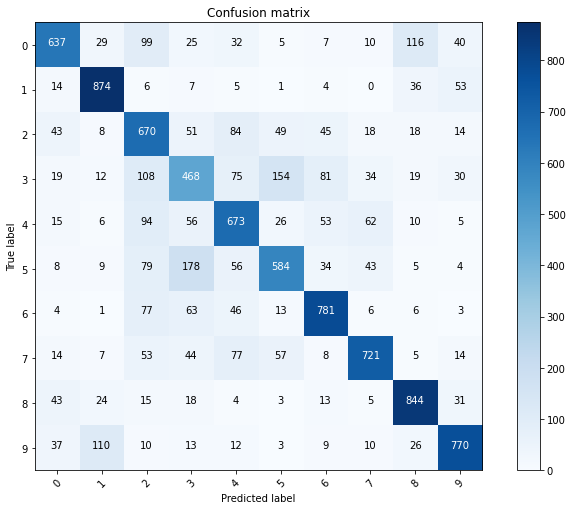

In [146]:
cm = confusion_matrix(y_test,y_predictions)
print(cm)

results = multilabel_confusion_matrix(y_true=y_test, y_pred=y_predictions) 
print ('Confusion Matrix :')
print(results) 

plot_confusion_matrix(cm, list(range(10)))


In [147]:

from sklearn.metrics import classification_report
print(classification_report(y_test , y_predictions ))

              precision    recall  f1-score   support

           0       0.76      0.64      0.69      1000
           1       0.81      0.87      0.84      1000
           2       0.55      0.67      0.61      1000
           3       0.51      0.47      0.49      1000
           4       0.63      0.67      0.65      1000
           5       0.65      0.58      0.62      1000
           6       0.75      0.78      0.77      1000
           7       0.79      0.72      0.76      1000
           8       0.78      0.84      0.81      1000
           9       0.80      0.77      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000

